In [1]:
import numpy as np
import pandas as pd
import nltk
import string
import random
import copy
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 2)

1) Study the job metadata. Extract the relevant information to describe the
job’s attributes.
For example:
○ What is the sector, sub-sector of each job?
○ Where is the location of the job?
○ Which is the range of salaries for each job?

In [2]:
# The location of each job is given generally in the 'Location' attribute and more specifically in the 'Area' attribute

# The sector of each job is given in the 'Classification' attribute and the sub-sector is given in the 'SubClassification' attribute

In [3]:
df = pd.read_csv('preprocessed.csv', low_memory=False)
df['Date'] = df['Date'].astype('datetime64[ns]')
df['SalaryRange'] = (df['HighestSalary']-df['LowestSalary'])
df['AverageSalary'] = (df['HighestSalary']+df['LowestSalary'])/2

In [4]:
df.head(10)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,FullDescriptionTokens,RequirementTokens,TitleTokens,SalaryRange,AverageSalary
0,37515643,Forklift Drivers WANTED! ***FULL TIME OPPORTUN...,Australian Personnel Solutions,2018-10-19,Melbourne,Western Suburbs,"Manufacturing, Transport & Logistics","Warehousing, Storage & Distribution",Our client is looking for an experienced count...,Our client is based in Yarraville&nbsp;and is ...,50,60,Contract/Temp,"['Our', 'client', 'based', 'Yarravillenbspand'...","['Our', 'client', 'looking', 'experienced', 'c...","['Our', 'client', 'looking', 'experienced', 'c...",10,55.0
1,38154814,Delivery Lead/Iteration Manager,DIUS Computing Pty Ltd,2019-01-20,Other,Other,Other,Other,If you love all things Agile and have experien...,DiUS is an Australian technology consultancy. ...,120,150,Full Time,"['DiUS', 'Australian', 'technology', 'consulta...","['If', 'love', 'thing', 'Agile', 'experience',...","['If', 'love', 'thing', 'Agile', 'experience',...",30,135.0
2,37999957,"Local Manager. Permanent, Full time - Lower Hu...",Life Without Barriers,2019-01-02,Other,Other,Other,Other,Join our Lower Hunter team as a Local Manager ...,About the&nbsp;Organisation Life Without Barri...,100,120,Full Time,"['About', 'thenbspOrganisation', 'Life', 'With...","['Join', 'Lower', 'Hunter', 'team', 'Local', '...","['Join', 'Lower', 'Hunter', 'team', 'Local', '...",20,110.0
3,37936799,Clinical Nurse Educator - Youth Justice,Correct Care Australasia,2018-12-14,Melbourne,CBD & Inner Suburbs,Healthcare & Medical,"Nursing - Psych, Forensic & Correctional Health",This is an exciting opportunity for a Clinical...,Correct Care Australasia (Correct Care)...,0,30,Part Time,"['Correct', 'Care', 'Australasia', 'Correct', ...","['This', 'exciting', 'opportunity', 'Clinical'...","['This', 'exciting', 'opportunity', 'Clinical'...",30,15.0
4,37680645,Graduate Project Engineer,Other,2018-11-09,Melbourne,Western Suburbs,Engineering,Project Engineering,Elastomers Australia are currently seeking a G...,The Company Elastomers Australia is an industr...,50,60,Full Time,"['The', 'Company', 'Elastomers', 'Australia', ...","['Elastomers', 'Australia', 'currently', 'seek...","['Elastomers', 'Australia', 'currently', 'seek...",10,55.0
5,38063057,Receptionist,Gough Property & Real Estate Recruiters,2019-01-09,Other,Other,Other,Other,** Entry Level Real Estate Reception roles SYD...,Do you want a break into real estate?&nbsp; ...,40,50,Full Time,"['Do', 'want', 'break', 'real', 'estatenbsp', ...","['Entry', 'Level', 'Real', 'Estate', 'Receptio...","['Entry', 'Level', 'Real', 'Estate', 'Receptio...",10,45.0
6,38079997,Principal Engineer Operations Planning,Powerlink,2019-01-10,Other,Other,Other,Other,Critical expert role to keep Queensland's HV t...,"Powerlink, and its predecessor companies have ...",150,200,Contract/Temp,"['Powerlink', 'predecessor', 'company', 'helpi...","['Critical', 'expert', 'role', 'keep', 'Queens...","['Critical', 'expert', 'role', 'keep', 'Queens...",50,175.0
7,38068325,Forklift Operator with Admin Experience,Toll,2019-01-10,Other,Other,Other,Other,Immediate start / Morning shift available / Ex...,About the company Toll People in conju...,30,40,Full Time,"['About', 'company', 'Toll', 'People', 'conjun...","['Immediate', 'start', 'Morning', 'shift', 'av...","['Immediate', 'start', 'Morning', 'shift', 'av...",10,35.0
8,37409088,Retail Goods Receiving / Warehouse - Springwood,Total Tools - Store Network,2018-10-08,Brisbane,Southern Suburbs & Logan,Retail & Consumer Products,Other,Utilise your goods receiving experience and wa...,About the Role Total Tools Springwood is...,40,50,Full Time,"['About', 'Role', 'Total', 'Tools', 'Springwoo...","['Utilise', 'good', 'receiving', 'experience',...","['Utilise', 'good', 'receiving', 'experience',...",10,45.0
9,37449308,Commercial Manager - Oil & Gas - PNG based,Amida,2018-10-12,Brisbane,Other,"Mining, Re

In [5]:
#2 study by location
dfl = df['Location'].value_counts()
dfl

Other                                   3748
Sydney                                  1918
Melbourne                               1514
Brisbane                                 658
Perth                                    431
                                        ... 
Tumut, Snowy & Monaro                      4
Yorke Peninsula & Clare Valley             3
Fleurieu Peninsula & Kangaroo Island       2
Somerset & Lockyer                         2
Central & South East TAS                   1
Name: Location, Length: 66, dtype: int64

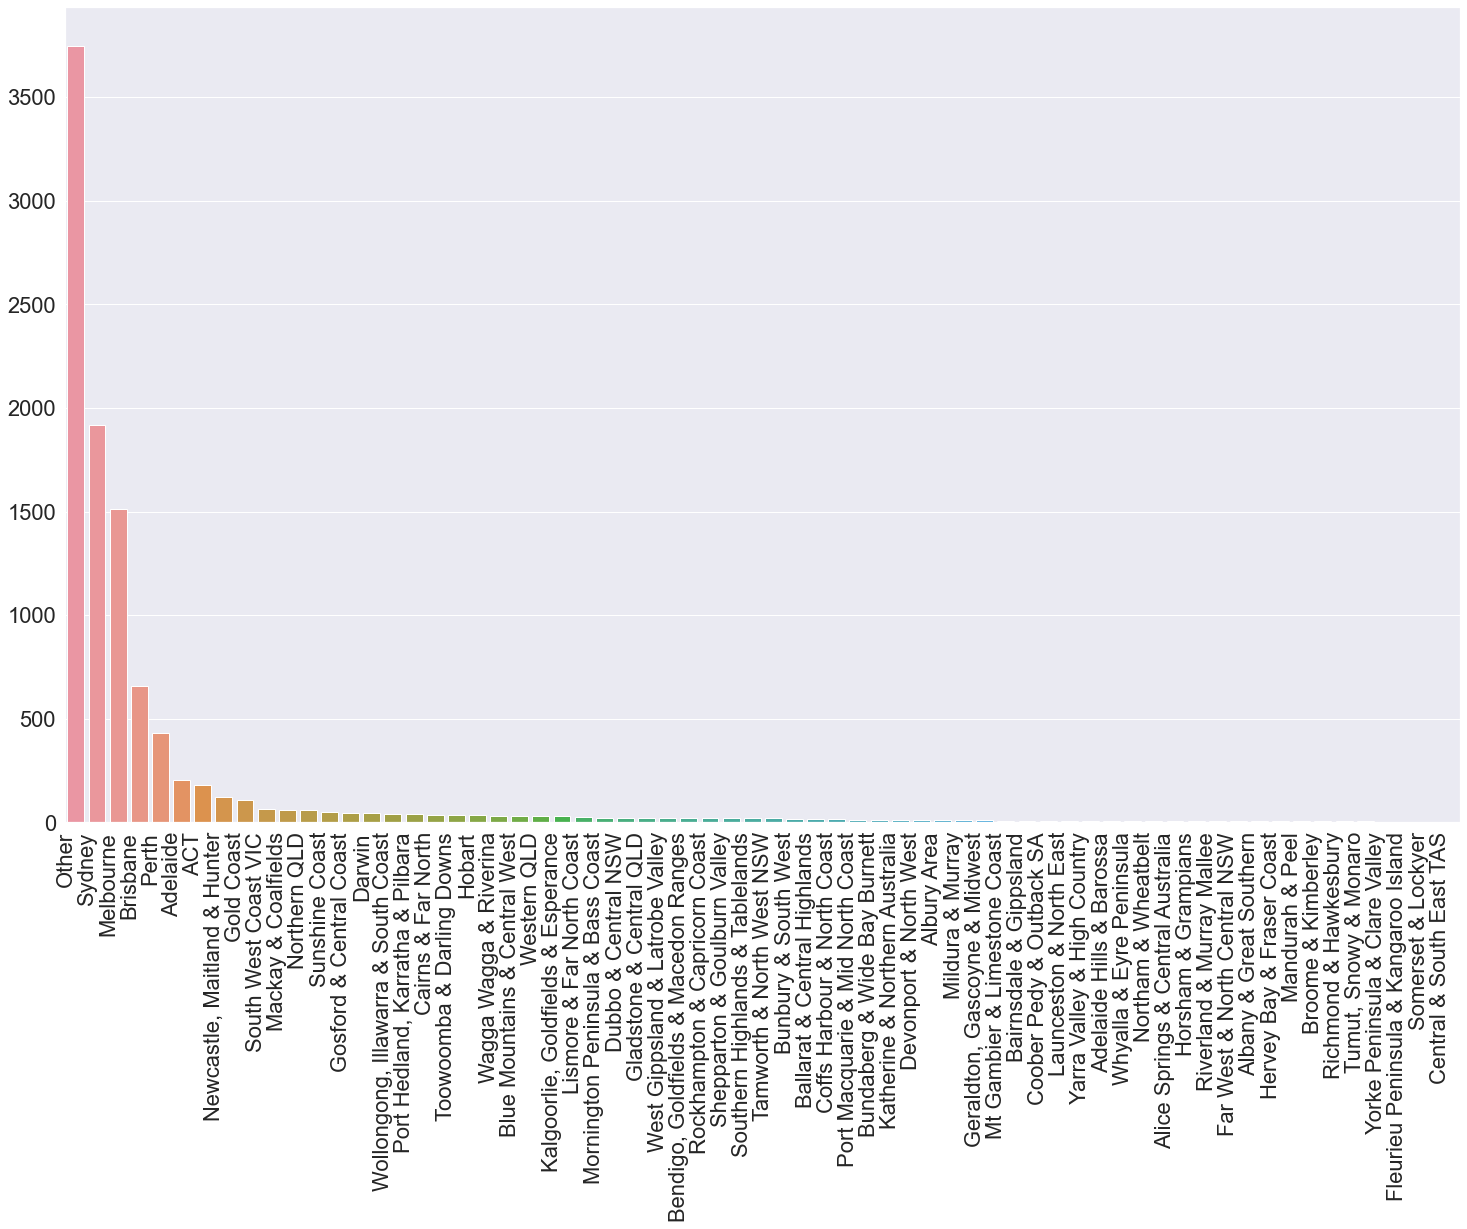

In [6]:
plt.figure(figsize=(25,15))
ax = sns.barplot(x=dfl.index, y=dfl.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [7]:
dfl=dfl.iloc[1:]
dfl

Sydney                                  1918
Melbourne                               1514
Brisbane                                 658
Perth                                    431
Adelaide                                 204
                                        ... 
Tumut, Snowy & Monaro                      4
Yorke Peninsula & Clare Valley             3
Fleurieu Peninsula & Kangaroo Island       2
Somerset & Lockyer                         2
Central & South East TAS                   1
Name: Location, Length: 65, dtype: int64

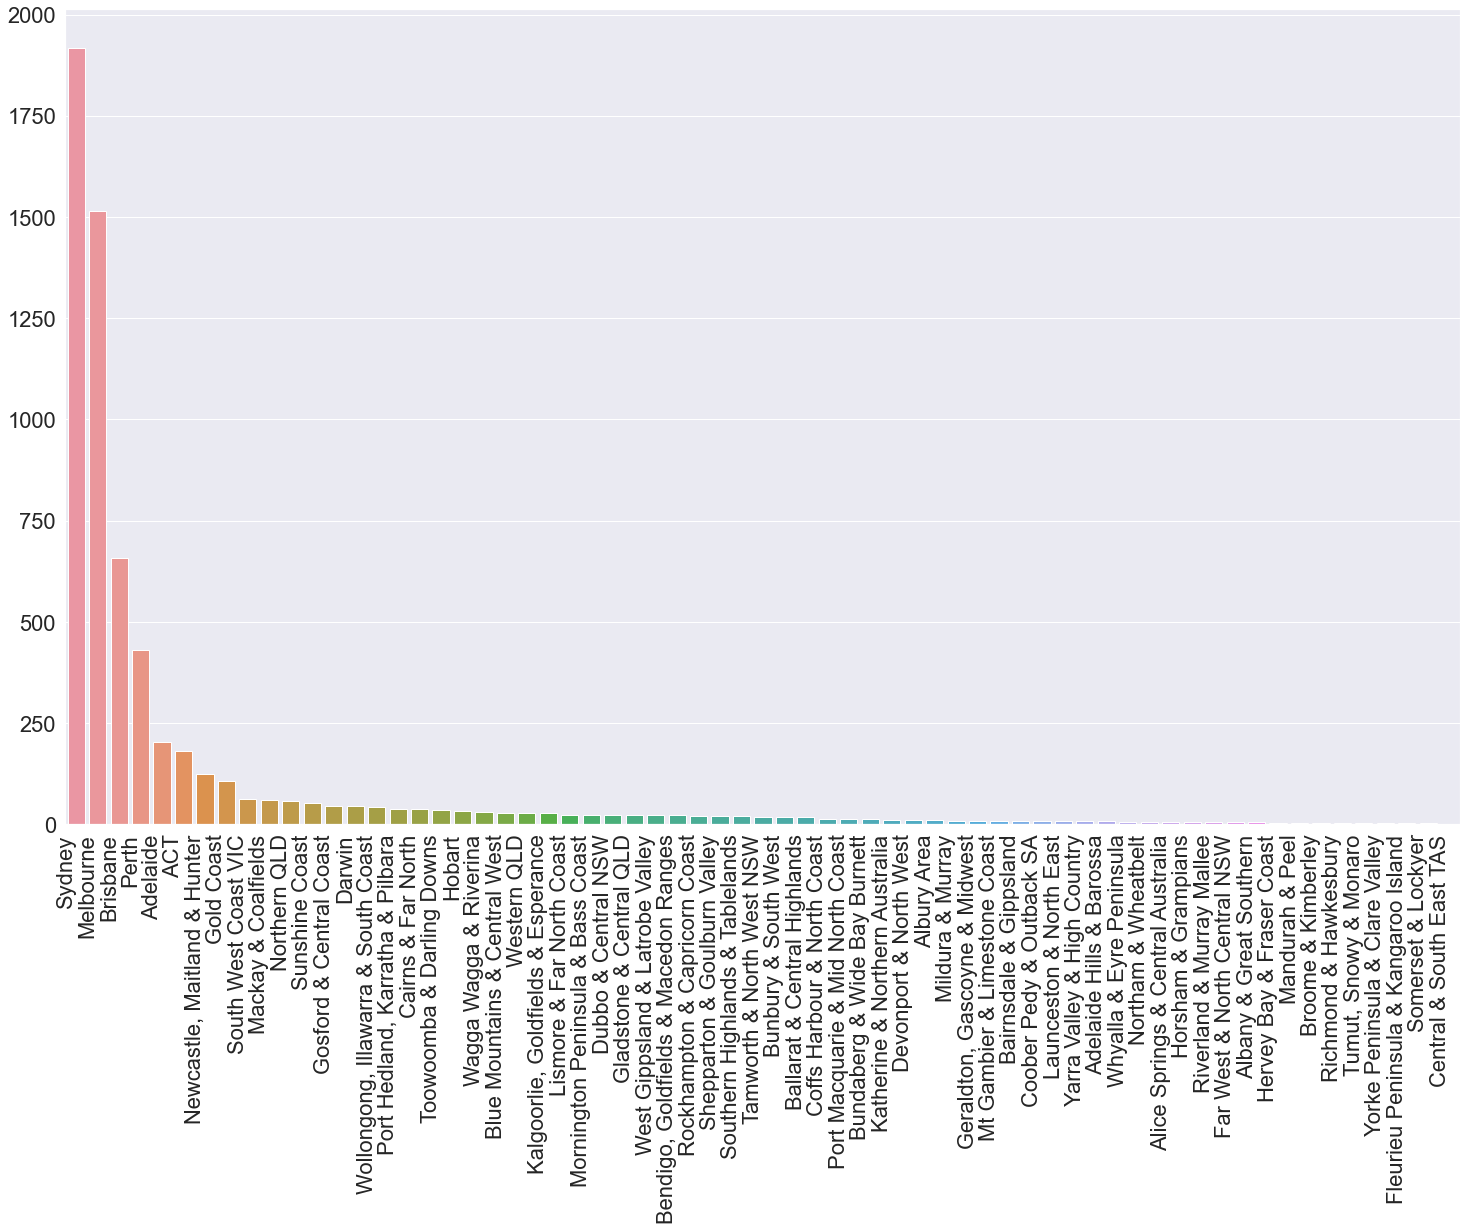

In [8]:
plt.figure(figsize=(25,15))
ax = sns.barplot(x=dfl.index, y=dfl.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [9]:
def fullframe(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [16]:
freq_sectors = []
for x in dfl.index:
    freq_sectors.append(df.loc[df['Location'] == x]['Classification'].value_counts().index[0])
dfls = pd.Series(freq_sectors,dfl.index)
fullframe(dfls)

Sydney                                  Information & Communication Technology
Melbourne                               Information & Communication Technology
Brisbane                                Information & Communication Technology
Perth                                               Mining, Resources & Energy
Adelaide                                  Manufacturing, Transport & Logistics
ACT                                     Information & Communication Technology
Newcastle, Maitland & Hunter                              Healthcare & Medical
Gold Coast                                               Hospitality & Tourism
South West Coast VIC                                     Hospitality & Tourism
Mackay & Coalfields                                 Mining, Resources & Energy
Northern QLD                                                 Trades & Services
Sunshine Coast                                           Hospitality & Tourism
Gosford & Central Coast                             

In [17]:
fullframe(dfls.value_counts())

Healthcare & Medical                      20
Mining, Resources & Energy                10
Trades & Services                         10
Hospitality & Tourism                      6
Community Services & Development           5
Information & Communication Technology     4
Manufacturing, Transport & Logistics       3
Administration & Office Support            3
Education & Training                       2
Engineering                                1
Sport & Recreation                         1
dtype: int64


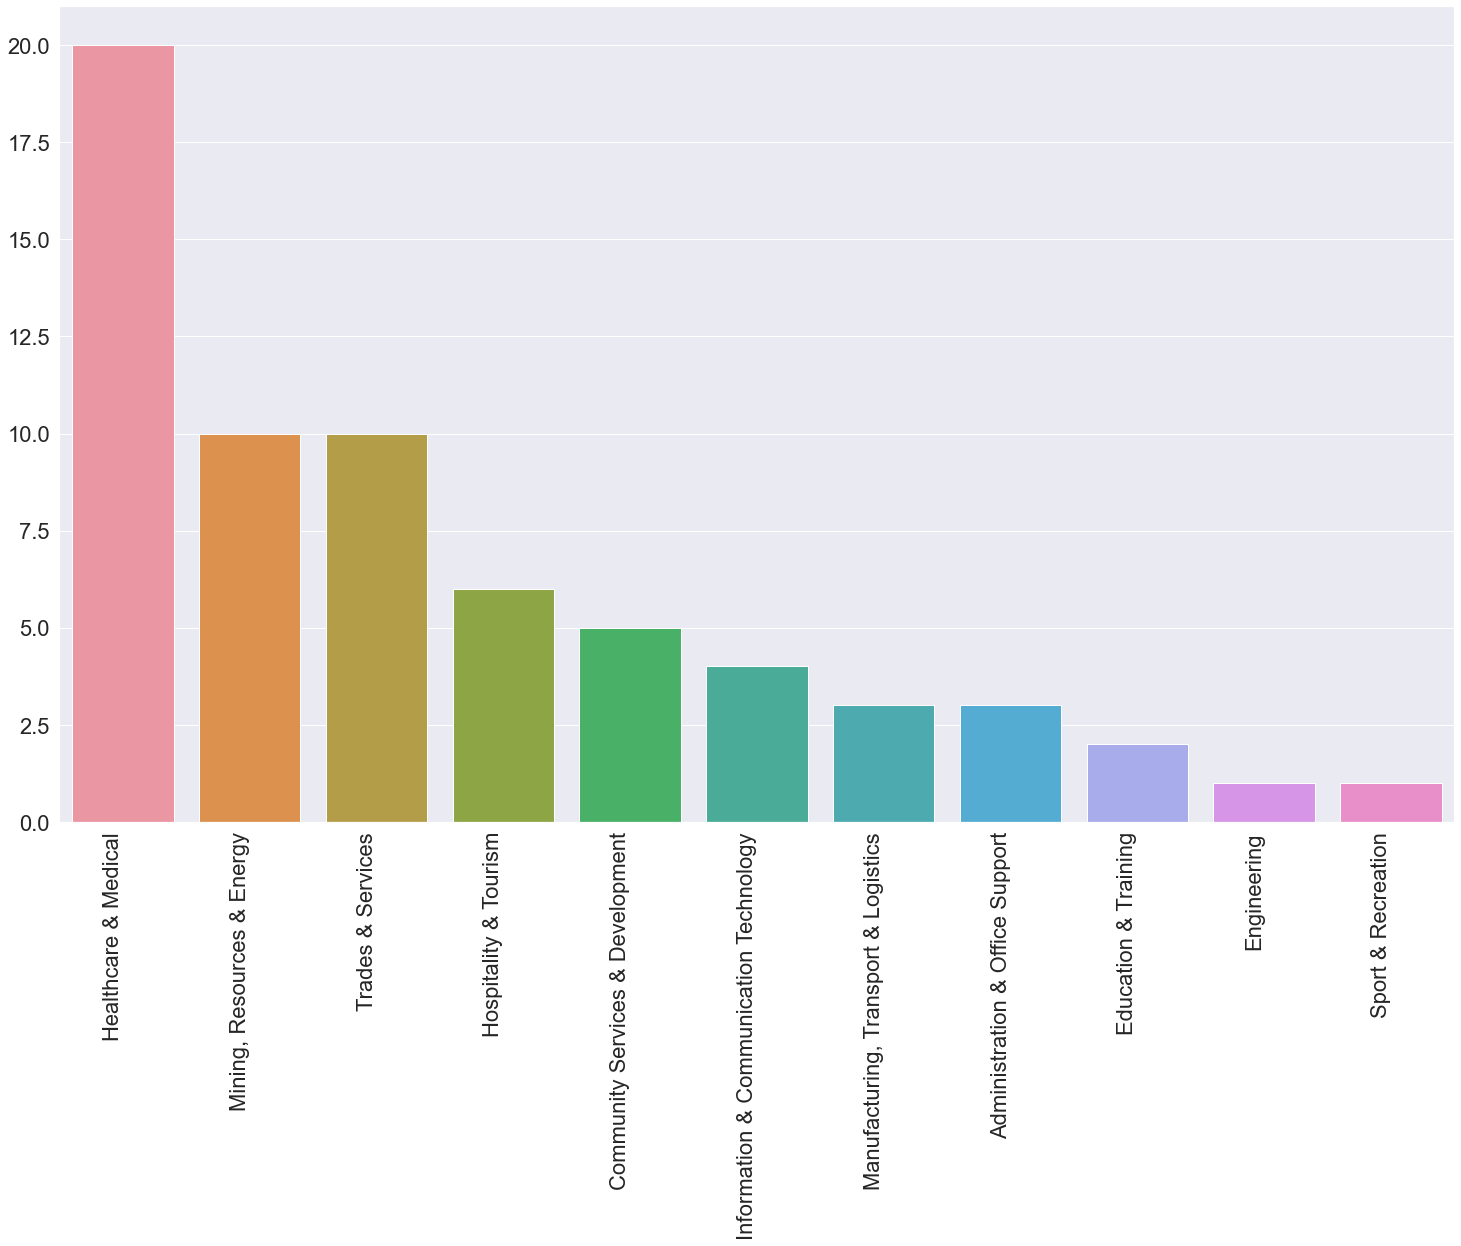

In [18]:
plt.figure(figsize=(25,15))
ax = sns.barplot(x=dfls.value_counts().index, y=dfls.value_counts().values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [19]:
freq_range = []
for x in dfl.index:
    freq_range.append(df.loc[df['Location'] == x]['SalaryRange'].value_counts().index[0])
dflr = pd.Series(freq_range,dfl.index)
fullframe(dflr)

Sydney                                  10
Melbourne                               10
Brisbane                                10
Perth                                   10
Adelaide                                10
ACT                                     10
Newcastle, Maitland & Hunter            10
Gold Coast                              10
South West Coast VIC                    10
Mackay & Coalfields                     10
Northern QLD                            10
Sunshine Coast                          10
Gosford & Central Coast                 10
Darwin                                  10
Wollongong, Illawarra & South Coast     10
Port Hedland, Karratha & Pilbara        30
Cairns & Far North                      10
Toowoomba & Darling Downs               10
Hobart                                  10
Wagga Wagga & Riverina                  10
Blue Mountains & Central West           10
Western QLD                             10
Kalgoorlie, Goldfields & Esperance      30
Lismore & F

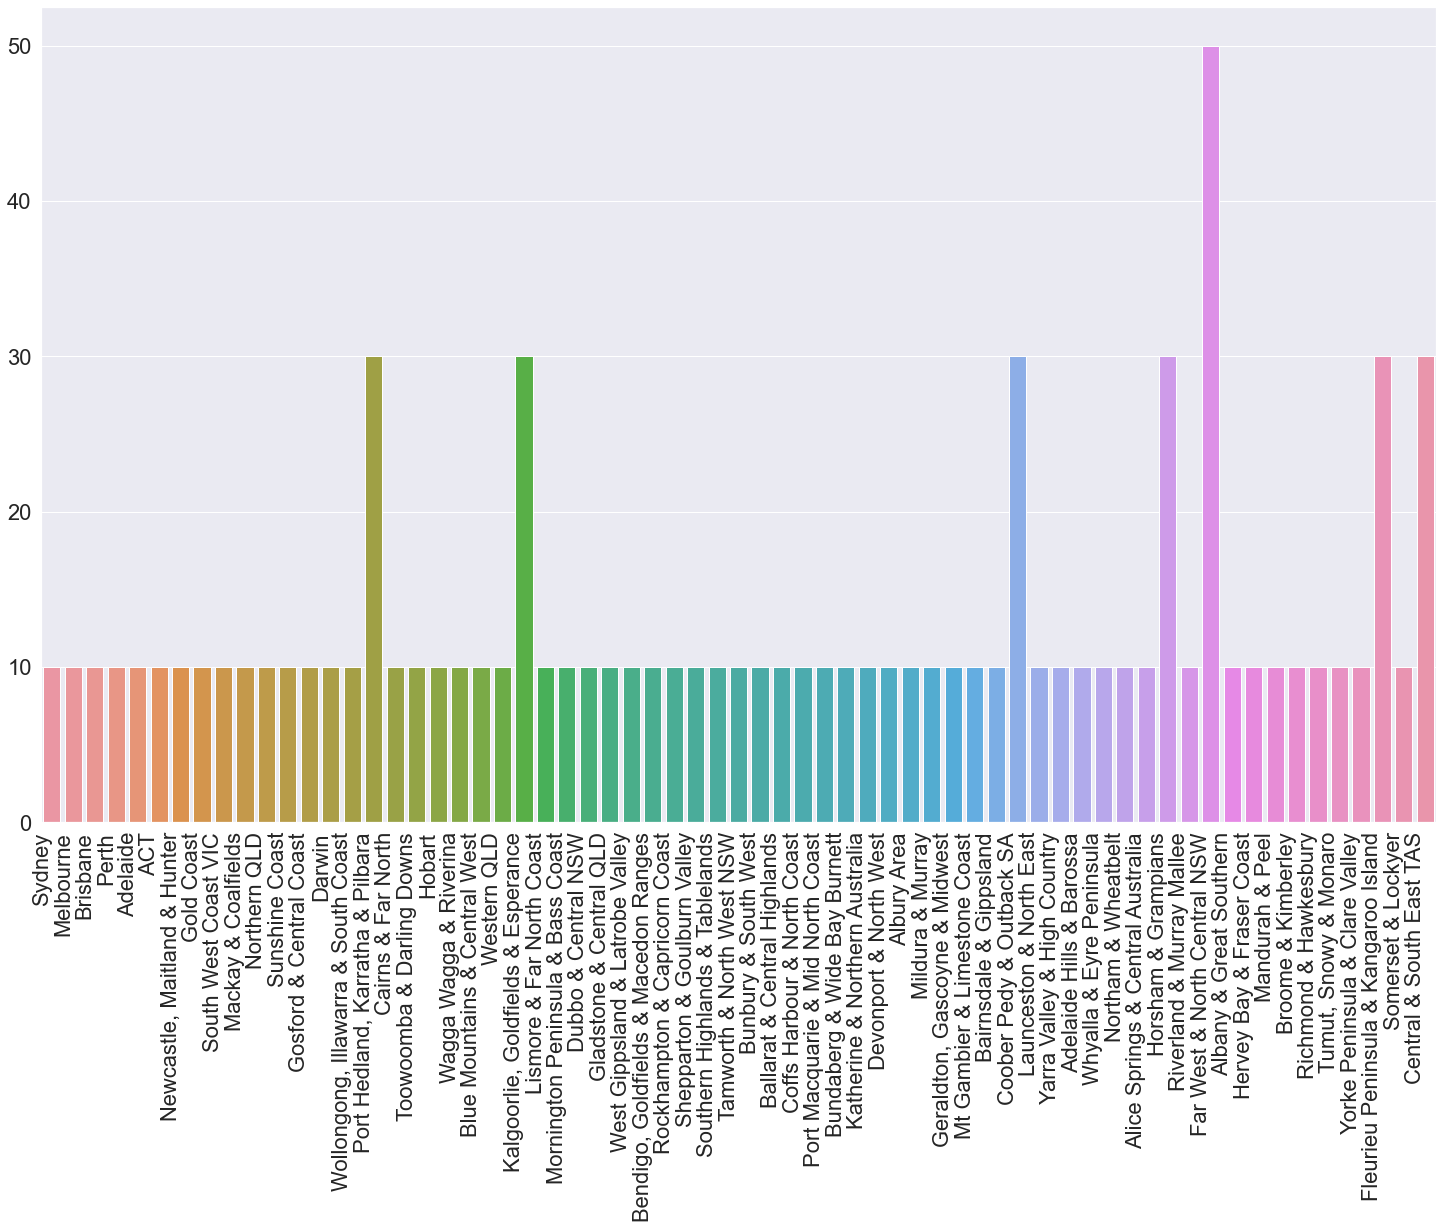

In [33]:
plt.figure(figsize=(25,15))
ax = sns.barplot(x=dflr.index, y=dflr.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [20]:
fullframe(dflr.value_counts())

10    58
30     6
50     1
dtype: int64


In [22]:
freq_avg = []
for x in dfl.index:
    freq_avg.append(df.loc[df['Location'] == x]['AverageSalary'].value_counts().index[0])
dfla = pd.Series(freq_avg,dfl.index)
fullframe(dfla)

Sydney                                   15.0
Melbourne                                15.0
Brisbane                                 15.0
Perth                                    15.0
Adelaide                                 15.0
ACT                                      15.0
Newcastle, Maitland & Hunter             15.0
Gold Coast                               45.0
South West Coast VIC                     15.0
Mackay & Coalfields                      15.0
Northern QLD                             15.0
Sunshine Coast                           45.0
Gosford & Central Coast                  35.0
Darwin                                   15.0
Wollongong, Illawarra & South Coast      15.0
Port Hedland, Karratha & Pilbara         15.0
Cairns & Far North                       35.0
Toowoomba & Darling Downs                15.0
Hobart                                   15.0
Wagga Wagga & Riverina                   15.0
Blue Mountains & Central West            15.0
Western QLD                       

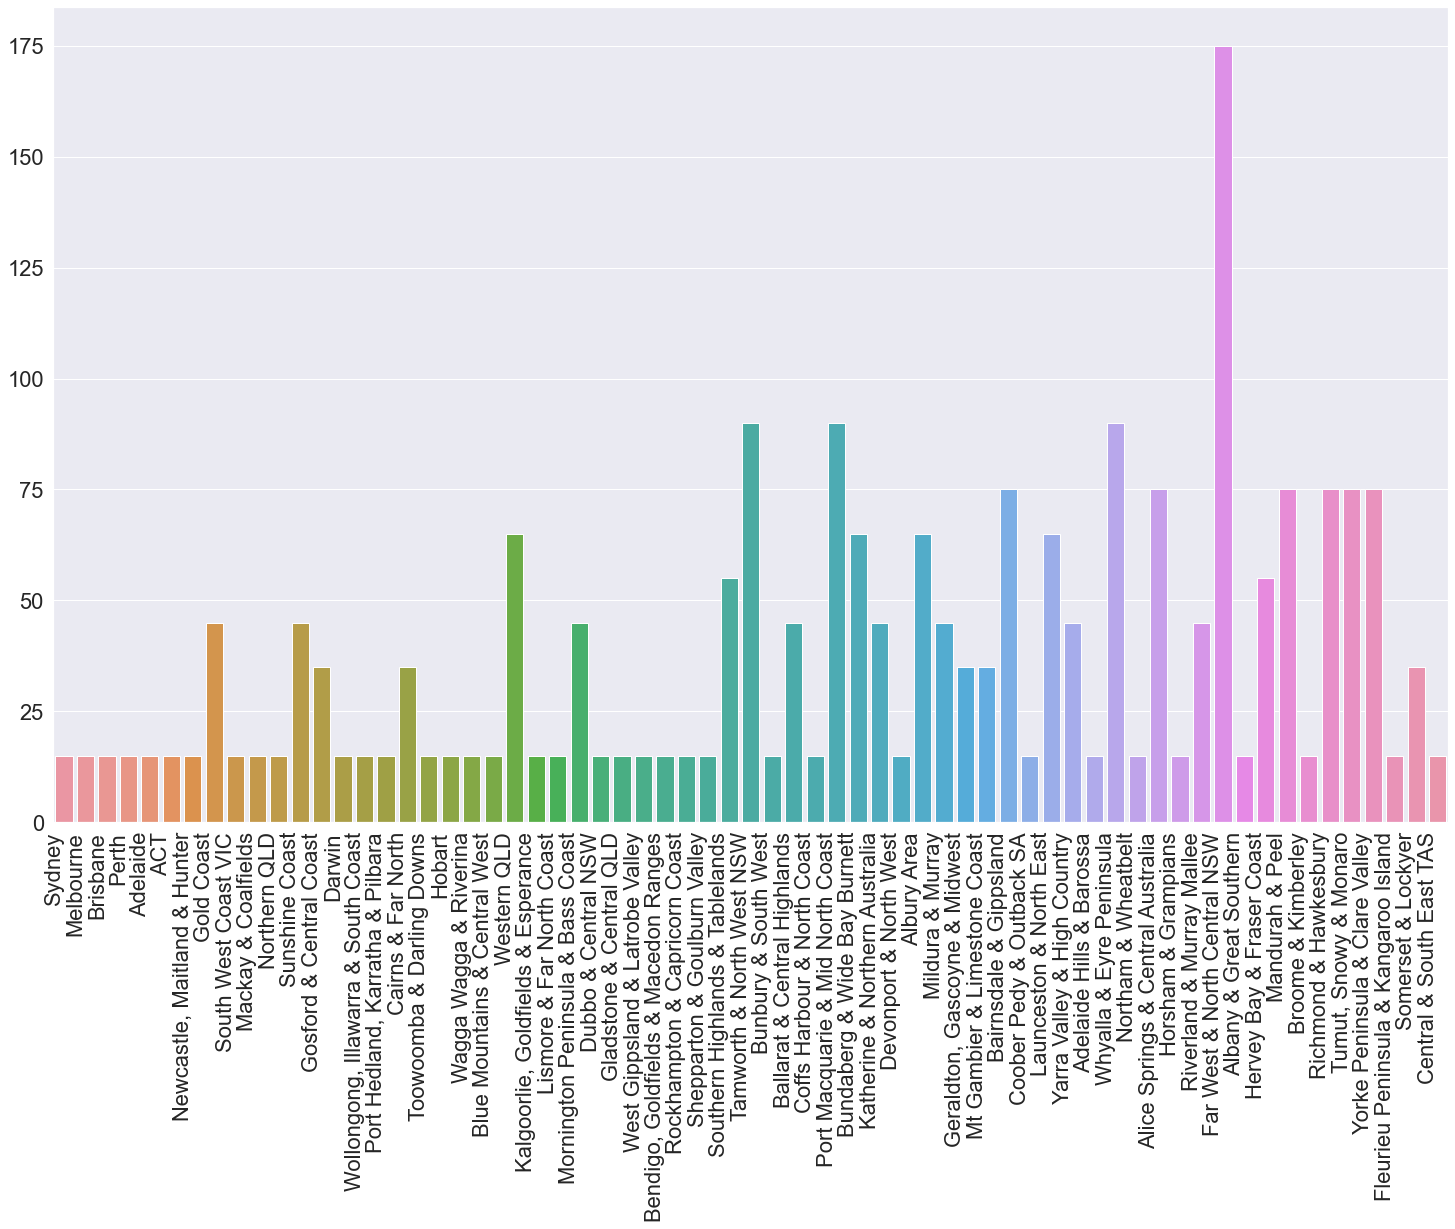

In [34]:
plt.figure(figsize=(25,15))
ax = sns.barplot(x=dfla.index, y=dfla.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [24]:
fullframe(dfla.value_counts())

15.0     36
45.0      8
75.0      6
35.0      5
65.0      4
90.0      3
55.0      2
175.0     1
dtype: int64


In [25]:
#3 study by sectors
dfs = df['Classification'].value_counts()
dfs

Other                                     3748
Information & Communication Technology     724
Trades & Services                          558
Healthcare & Medical                       544
Hospitality & Tourism                      459
Manufacturing, Transport & Logistics       388
Accounting                                 309
Administration & Office Support            308
Education & Training                       263
Construction                               258
Sales                                      249
Retail & Consumer Products                 238
Government & Defence                       220
Mining, Resources & Energy                 212
Engineering                                197
Community Services & Development           170
Legal                                      156
Banking & Financial Services               148
Marketing & Communications                 137
Call Centre & Customer Service             135
Human Resources & Recruitment              122
Real Estate &

In [26]:
dfs=dfs.iloc[1:]
dfs

Information & Communication Technology    724
Trades & Services                         558
Healthcare & Medical                      544
Hospitality & Tourism                     459
Manufacturing, Transport & Logistics      388
Accounting                                309
Administration & Office Support           308
Education & Training                      263
Construction                              258
Sales                                     249
Retail & Consumer Products                238
Government & Defence                      220
Mining, Resources & Energy                212
Engineering                               197
Community Services & Development          170
Legal                                     156
Banking & Financial Services              148
Marketing & Communications                137
Call Centre & Customer Service            135
Human Resources & Recruitment             122
Real Estate & Property                    113
Design & Architecture             

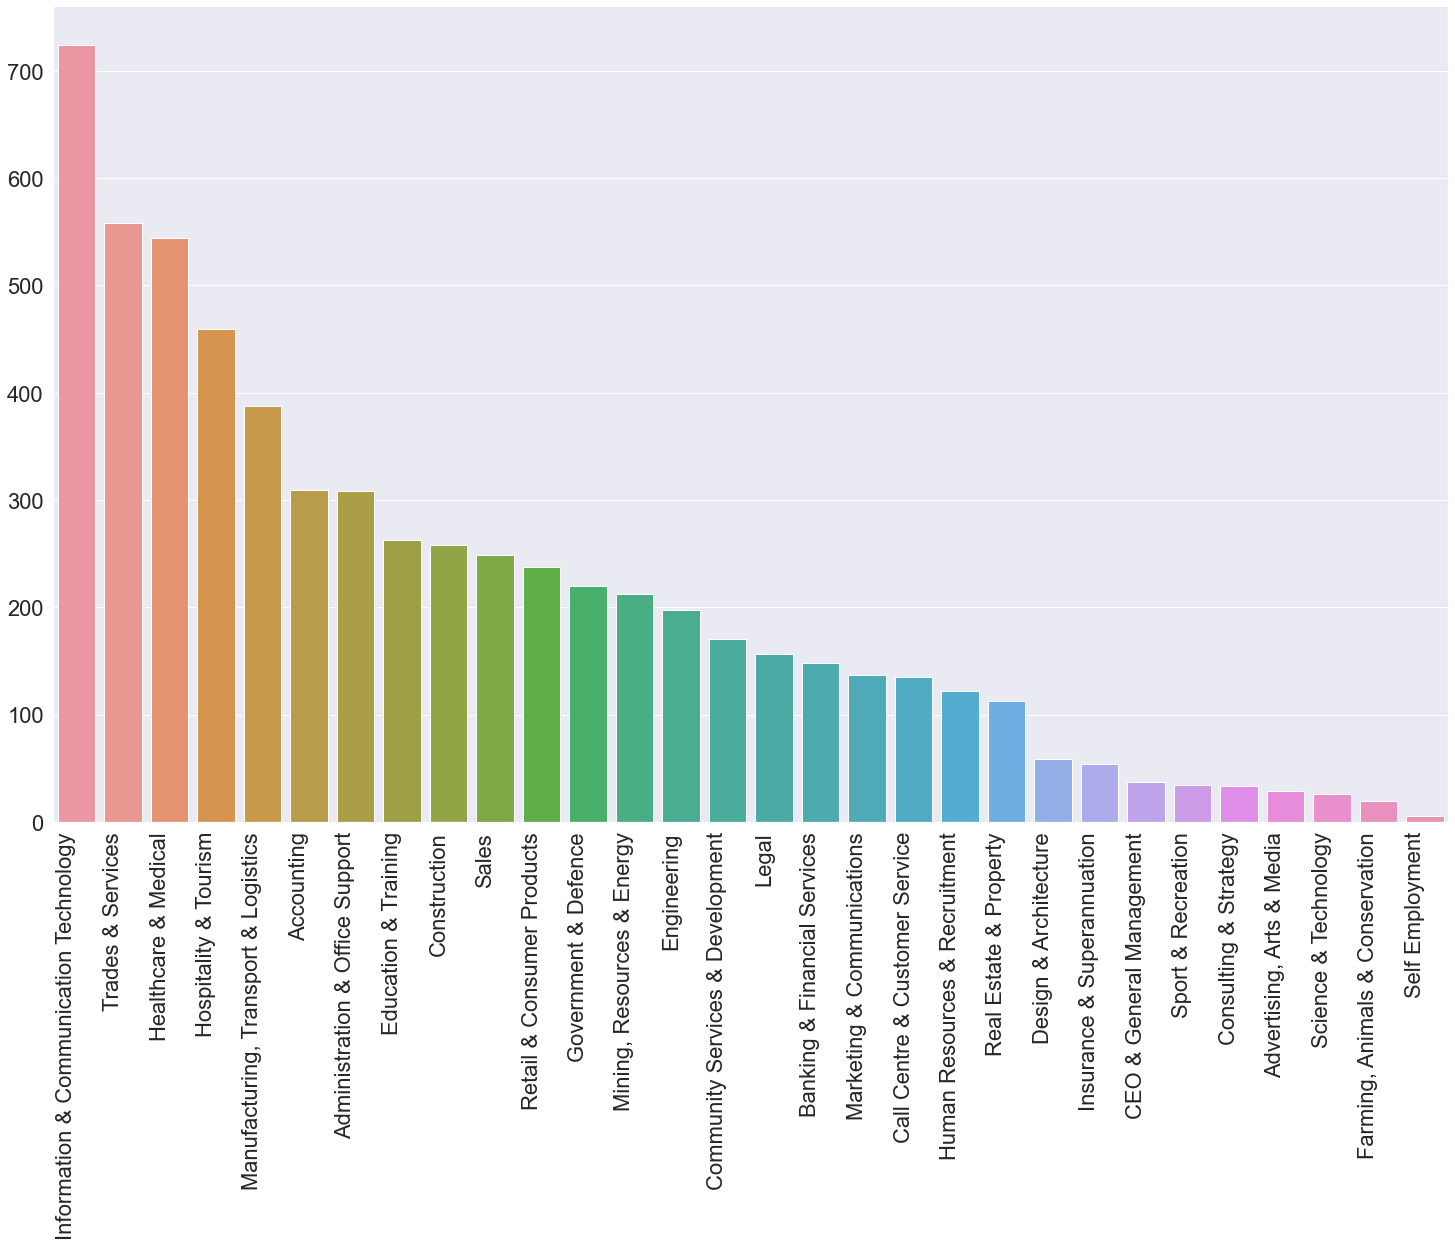

In [27]:
plt.figure(figsize=(25,15))
ax = sns.barplot(x=dfs.index, y=dfs.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [28]:
freq_subsectors = []
for x in dfs.index:
    freq_subsectors.append(df.loc[df['Classification'] == x]['SubClassification'].value_counts().index[0])
dfss = pd.Series(freq_subsectors,dfs.index)
fullframe(dfss)

Information & Communication Technology                       Developers/Programmers
Trades & Services                                                 Automotive Trades
Healthcare & Medical                                            Nursing - Aged Care
Hospitality & Tourism                                                   Chefs/Cooks
Manufacturing, Transport & Logistics            Warehousing, Storage & Distribution
Accounting                                         Financial Accounting & Reporting
Administration & Office Support                           Administrative Assistants
Education & Training                                                          Other
Construction                                                     Project Management
Sales                                             Sales Representatives/Consultants
Retail & Consumer Products                                        Retail Assistants
Government & Defence                                             Government 

In [29]:
freq_sub_range = []
for x in dfs.index:
    freq_sub_range.append(df.loc[df['Classification'] == x]['SalaryRange'].value_counts().index[0])
dfsr = pd.Series(freq_sub_range,dfs.index)
fullframe(dfsr)

Information & Communication Technology    30
Trades & Services                         10
Healthcare & Medical                      10
Hospitality & Tourism                     10
Manufacturing, Transport & Logistics      10
Accounting                                10
Administration & Office Support           10
Education & Training                      10
Construction                              30
Sales                                     10
Retail & Consumer Products                10
Government & Defence                      20
Mining, Resources & Energy                30
Engineering                               30
Community Services & Development          10
Legal                                     10
Banking & Financial Services              30
Marketing & Communications                10
Call Centre & Customer Service            10
Human Resources & Recruitment             10
Real Estate & Property                    10
Design & Architecture                     10
Insurance 

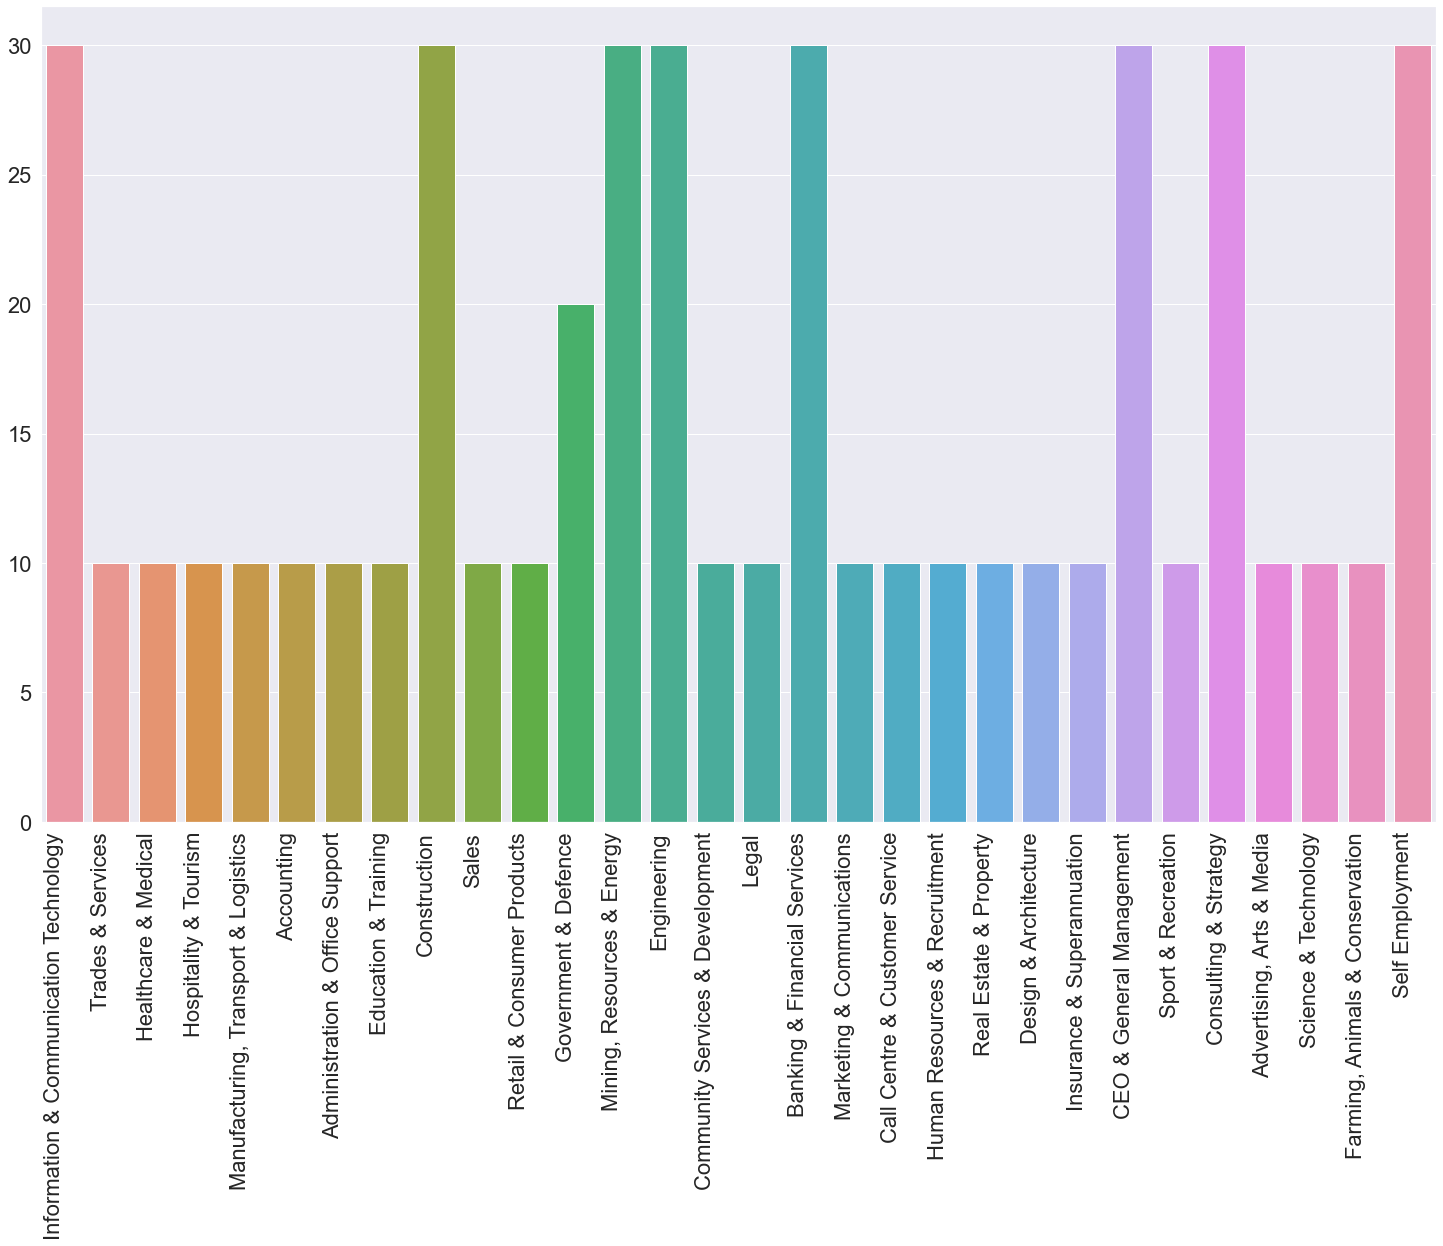

In [31]:
plt.figure(figsize=(25,15))
ax = sns.barplot(x=dfsr.index, y=dfsr.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [30]:
freq_sub_avg = []
for x in dfs.index:
    freq_sub_avg.append(df.loc[df['Classification'] == x]['AverageSalary'].value_counts().index[0])
dfsa = pd.Series(freq_sub_avg,dfs.index)
fullframe(dfsa)

Information & Communication Technology    175.0
Trades & Services                          15.0
Healthcare & Medical                       15.0
Hospitality & Tourism                      35.0
Manufacturing, Transport & Logistics       15.0
Accounting                                 15.0
Administration & Office Support            45.0
Education & Training                       15.0
Construction                              110.0
Sales                                      15.0
Retail & Consumer Products                 45.0
Government & Defence                      110.0
Mining, Resources & Energy                 15.0
Engineering                                15.0
Community Services & Development           15.0
Legal                                     175.0
Banking & Financial Services               15.0
Marketing & Communications                 15.0
Call Centre & Customer Service             45.0
Human Resources & Recruitment              15.0
Real Estate & Property                  

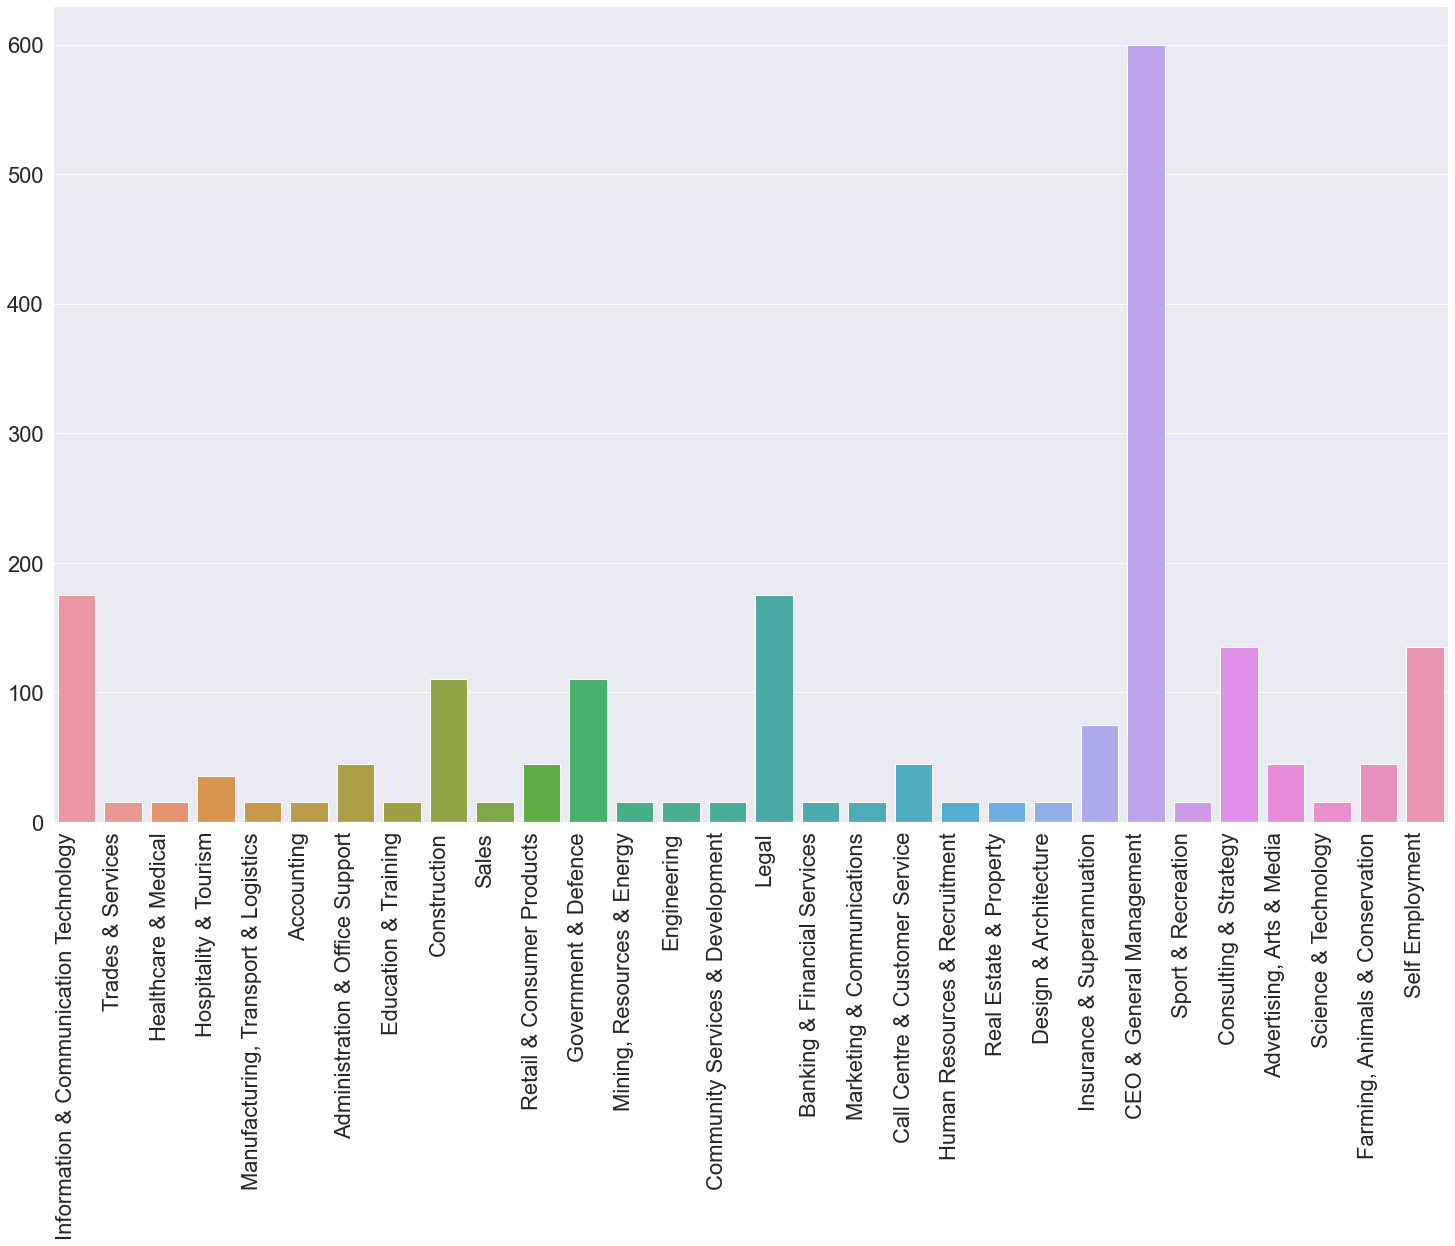

In [32]:
plt.figure(figsize=(25,15))
ax = sns.barplot(x=dfsa.index, y=dfsa.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()